In [8]:
print("GROUP 1: K-MEANS CLUSTERING")

GROUP 1: K-MEANS CLUSTERING


In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from sklearn.model_selection import train_test_split 

pd.options.mode.copy_on_write = True

In [10]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df = df.dropna()
df.info()

#establishing which 2 features to use
# feature1 = "length"
# feature2 = "weight"
feature1 = "SepalLengthCm"
feature2 = "SepalWidthCm"

# in case 3 features will be tested
# feature3 = "w_l_ratio"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


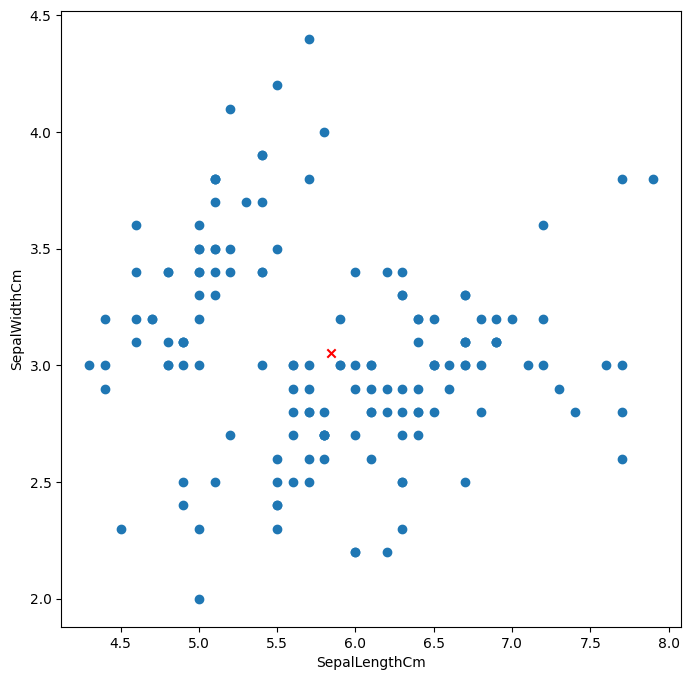

In [13]:
X = df[[feature1, feature2]]
Y = df['species']
true_labels = Y.values.tolist()
X.head()

#plotting what the current dataset looks like
centroid = [X[feature1].mean(), X[feature2].mean()]

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[feature1], X[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.25, shuffle=True)

X_train.head()

,SepalLengthCm,SepalWidthCm
56,6.3,3.3
2,4.7,3.2
51,6.4,3.2
7,5.0,3.4
39,5.1,3.4


In [15]:
# train split
X_train.head()

,SepalLengthCm,SepalWidthCm
56,6.3,3.3
2,4.7,3.2
51,6.4,3.2
7,5.0,3.4
39,5.1,3.4


In [16]:
# test split
X_test.head()

,SepalLengthCm,SepalWidthCm
31,5.4,3.4
18,5.7,3.8
10,5.4,3.7
64,5.6,2.9
134,6.1,2.6


In [17]:
# distance formula
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

In [18]:
# assigns each data point to its respective cluster based on its distance to a centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters


In [19]:
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(random.choice(cluster))  # Assign random point if cluster is empty
    return new_centroids

In [20]:
def compute_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += calculate_euclidean_distance(point, centroids[i]) ** 2
    return wcss

In [21]:
def plot_clusters(data, centroids, clusters, iteration, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(7, 7))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}, {k} Cluster/s')
    plt.legend()
    plt.show()

In [22]:
# K-Means Algorithm with visualization
def k_means(data, k, max_iters=1000):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids) # determines clusters

        plot_clusters(data, centroids, clusters, i+1,k)  # Plot each iteration

        wcss = compute_wcss(clusters, centroids)
        new_centroids = compute_centroids(clusters) # assigns new centroids
        if new_centroids == centroids:
            print(f"Iteration {i+1}, {k} Cluster/s. WCSS: {wcss}")
            wcss_values[k] = wcss
            # reference_cluster[k] = {cluster := centroid}
            break  # Stops if centroids do not change
        centroids = new_centroids
    return centroids, clusters

In [ ]:
# Run k-means a bunch of times
wcss_values = {}
reference_cluster = {}
for i in range(1, 11):
    centroids, clusters = k_means(X.values.tolist(), i)

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
def compute_elbow_angle(wcss_values, max_k=10):
    angles = {}
    keys = list(wcss_values.keys())
    values = list(wcss_values.values())
    for i in range(1, len(keys) - 1):
        p1 = np.array([keys[i - 1], values[i - 1]])
        p2 = np.array([keys[i], values[i]])
        p3 = np.array([keys[i + 1], values[i + 1]])

        p2_1 = p1 - p2
        p2_3 = p3 - p2
        
        cosine_angle = np.dot(p2_1, p2_3) / (np.linalg.norm(p2_1) * np.linalg.norm(p2_3))
        angle = np.degrees(np.arccos(cosine_angle))
        print(f'{keys[i]}: {angle}')
        angles[keys[i]] = angle
    angle_values = list(angles.values())
    elbow_k = 2 + np.argmax(angle_values[:max_k-2])  # The point with the sharpest angle
    print(elbow_k)
    return elbow_k

In [ ]:
plt.plot(wcss_values.keys(), wcss_values.values(), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# print(wcss_values)
optimal_k = compute_elbow_angle(wcss_values)

# print(f'Optimal number of clusters: {}')

NameError: name 'wcss_values' is not defined

In [ ]:
# re-assign cluster variable to optimal number of clusters


In [ ]:
# # Function to evaluate clustering with confusion matrix
# def evaluate_clustering(true_labels, predicted_labels):
#     label_mapping = {}
#     for cluster_id in np.unique(predicted_labels):
#         mask = (predicted_labels == cluster_id)
#         most_common_label = mode(true_labels[mask])[0][0]
#         label_mapping[cluster_id] = most_common_label
    
#     mapped_predictions = np.vectorize(label_mapping.get)(predicted_labels)
#     cm = confusion_matrix(true_labels, mapped_predictions)
#     print("Confusion Matrix:")
#     print(cm)
#     return cm

In [ ]:
# # Assign predicted labels from clustering
# predicted_labels = np.zeros(len(data))
# for cluster_id, cluster_points in enumerate(clusters):
#     for point in cluster_points:
#         idx = data.index(point)
#         predicted_labels[idx] = cluster_id

# # Evaluate clustering performance
# cm = evaluate_clustering(true_labels, predicted_labels)